In [ ]:
import re
import pandas as pd
import numpy as np
from datetime import date, timedelta, datetime
import time
import requests as r
import random
from bs4 import BeautifulSoup

In [ ]:
def scrape_kayak(origin, destination, startdate, days, requests):

    global results1
    global results2

    enddate = datetime.strptime(startdate, '%Y-%m-%d').date() + timedelta(days)
    enddate = enddate.strftime('%Y-%m-%d')

    url = "https://www.kayak.com/flights/" + origin + "-" + destination + "/" + startdate + "/" + enddate + "?sort=bestflight_a&fs=stops=0"
    print("\n" + url)

    # chrome_options = webdriver.ChromeOptions()
    # # agents = ["Firefox/66.0.3","Chrome/73.0.3683.68","Edge/16.16299"]
    # # print("User agent: " + agents[(requests%len(agents))])
    # # chrome_options.add_argument('--user-agent=' + agents[(requests%len(agents))] + '"')
    # # chrome_options.add_experimental_option('useAutomationExtension', False)
    # service = Service(executable_path='./chromedriver.exe')
    # driver = webdriver.Chrome(service=service, options=chrome_options)

    # driver = webdriver.Chrome()
    # # driver.implicitly_wait(20)
    # driver.get(url)

    time.sleep(random.uniform(10, 20))
    # soup = BeautifulSoup(driver.page_source, 'lxml')

    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}
    response = r.get(url, headers=headers)
    print(response.content)
    # driver.get(url)

    time.sleep(random.uniform(10, 15))
    soup = BeautifulSoup(response.content, 'lxml')

    print(soup.find_all('p')[0].getText())


    #arrival and departure times
    deptimes = soup.find_all('div',{'class':'vmXl vmXl-mod-variant-large'})

    deptime = []
    arrtime = []

    for dep in deptimes:
        if deptimes.index(dep) %2 == 0:
            deptime.append(dep.getText())
        else:
            arrtime.append(dep.getText())

    #prices
    price_list = soup.find_all('div',{'class':'f8F1-price-text'})

    origins = []
    destinations = []
    startdates = []
    enddates = []
    price = []
    for p in price_list:
        price.append(p.getText())
        origins.append(origin)
        destinations.append(destination)
        startdates.append(startdate)
        enddates.append(enddate)


    df = pd.DataFrame({"Origin" : origins,
                       "Destination" : destinations,
                       "Price": price,
                       "Startdate" : startdates,
                       "Flight1 Time" : deptime,
                       "Flight2 Time" : arrtime,
                       "Enddate" : enddates
                                      })


    results1 = pd.concat([results1, df], sort=False)
    results1.to_csv('Kayak.csv')
    print(results1)


results1 = pd.DataFrame(columns=['Origin','Destination','Price','Startdate','Flight1 Time','Flight2 Time','Enddate'])

requests = 0

destinations = ['LHR']
startdates = ['2023-11-06']   #,'2023-11-07','2023-11-08'

for destination in destinations:
    for startdate in startdates:
        requests = requests + 1
        while scrape_kayak('HEL', destination, startdate, 2, requests) != "success":
            requests = requests + 1

In [ ]:
########### to scrape Booking.com ############
def scrape_booking(origin, destination, startdate, days, requests):

    global results1
    global results2

    enddate = datetime.strptime(startdate, '%Y-%m-%d').date() + timedelta(days)
    enddate = enddate.strftime('%Y-%m-%d')

    url = "https://booking.kayak.com/flights/" + origin + "-" + destination + "/" + startdate + "/" + enddate + "?sort=bestflight_a"
    print("\n" + url)

    # driver = webdriver.Chrome()
    # # driver.implicitly_wait(20)
    # driver.get(url)


    # time.sleep(20)
    # soup = BeautifulSoup(driver.page_source, 'lxml')

    time.sleep(random.uniform(10, 20))
    # soup = BeautifulSoup(driver.page_source, 'lxml')

    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}
    response = r.get(url, headers=headers)
    print(response.content)
    # driver.get(url)

    time.sleep(random.uniform(10, 15))
    soup = BeautifulSoup(response.content, 'lxml')


    #arrival and departure times
    deptimes = soup.find_all('span',{'class':'depart-time base-time'})
    arrivaltimes = soup.find_all('span',{'class':'arrival-time base-time'})
    times = soup.find_all('span',{'class':'time-meridiem meridiem'})

    ampm = []
    for t in times:
        ampm.append(t.getText())

    deptime1 = []
    deptime2 = []
    arrtime1 = []
    arrtime2 = []

    count = 0
    for dep in deptimes:
        if deptimes.index(dep) % 2 == 0 and count % 4 == 0:
            t1 = dep.getText() + ampm[count]
            deptime1.append(t1)
            count = count + 1
        elif deptimes.index(dep) % 2 == 1 and count % 4 == 1:
            t2 = dep.getText() + ampm[count]
            deptime2.append(t2)
            count = count + 3

    count = 2
    for arr in arrivaltimes:
        if arrivaltimes.index(arr) %2 == 0 and count % 4 == 2:
            t3 = arr.getText() + ampm[count]
            arrtime1.append(t3)
            count = count + 1
        elif arrivaltimes.index(arr) % 2 == 1 and count % 4 == 3:
            t4 = arr.getText() + ampm[count]
            arrtime2.append(t4)
            count = count + 3

    # print(deptime1)
    # print(deptime2)
    # print(arrtime1)
    # print(arrtime2)


    price_list = soup.find_all('span',{'class':'price-text'})

    origins = []
    destinations = []
    startdates = []
    enddates = []
    price = []
    for p in price_list:
        price.append(p.getText().replace('\n',''))
        origins.append(origin)
        destinations.append(destination)
        startdates.append(startdate)
        enddates.append(enddate)

    del deptime1[12:]
    del deptime2[12:]
    del arrtime1[12:]
    del arrtime2[12:]
    del price[12:]
    del origins[12:]
    del destinations[12:]
    del startdates[12:]
    del enddates[12:]


    df = pd.DataFrame({"Origin" : origins,
                       "Destination" : destinations,
                       "Price": price,
                       "Startdate" : startdates,
                       "Flight1 Departure Time" : deptime1,
                       "Flight1 Arrival Time" : arrtime1,
                       "Flight2 Departure Time" : deptime2,
                       "Flight2 Arrival Time" : arrtime2,
                       "Enddate" : enddates
                                      })


    results2 = pd.concat([results2, df], sort=False)
    results2.to_csv('Booking.csv')
    print(results2)

    # driver.close()

    time.sleep(5)
    return "success"

results2 = pd.DataFrame(columns=['Origin','Destination','Price','Startdate','Flight1 Departure Time','Flight1 Arrival Time','Flight2 Departure Time','Flight2 Arrival Time','Enddate'])

requests = 0

destinations = ['LHR']
startdates = ['2023-11-05']   #,'2023-11-07','2023-11-08'

for destination in destinations:
    for startdate in startdates:
        requests = requests + 1

        while scrape_booking('HEL', destination, startdate, 2, requests) != "success":
            requests = requests + 1


https://booking.kayak.com/flights/HEL-LHR/2023-11-05/2023-11-07?sort=bestflight_a
b'<!DOCTYPE html>\n<html lang="en-us" class="animation filter Flights-Search-FlightSearchPage-Html">\n<head prefix="og: http://ogp.me/ns# fb: http://ogp.me/ns/fb#" >\n<link rel="stylesheet" href="https://content.r9cdn.net/res/combined.css?v=a787c8276c96a4ef9b898d6f653fef6e45cd16d2-14pre-flipped&cluster=4" data-type="page"/>\n<link rel="stylesheet" href="https://content.r9cdn.net/res/combined.css?v=72ed894a7344a065f0c6bd4f357456d7103c9c16-14pre-flipped&cluster=4" data-type="page"/>\n<link rel="stylesheet" href="https://content.r9cdn.net/res/css/stl.css?v=3482f5355f5a87b7d228d9b65b3bcb050eb5c7dc-14pre-flipped-nc&cluster=4" data-type="page"/>\n<style type="application/metadata2" data-type="style-metadata2">\n58Jw1B71I5g3C27B18M17&EwQ:IFB1*Yq5E3I2C7I2IE2EI1Q3DR46o11Q1zuGY7G2E1D3P1M1Q12Q312I117BEE9I4B50B8Q3iQE414B1kiQJ6BJ2BI3I1iRJkiBJkiQJ4kiQJ1g1IEg12B1k4gB1kiQJ1C1J3JE5B1kiRJ1gB6CQB149C1I1g14E2J194B201kCRI1g4

In [ ]:
########### to scrape Skyscanner.com ############
def scrape_Skyscanner(origin, destination, startdate, days, requests):

    global results3

    enddate = datetime.strptime(startdate, '%Y-%m-%d').date() + timedelta(days)
    enddate = enddate.strftime('%Y%m%d')
    startdate = startdate.replace('-','')

    # driver = webdriver.Chrome()


    url = "https://www.skyscanner.fi/transport/flights/" + origin.lower() + "/" + destination.lower() + "/" + startdate + "/" + enddate + "?_ga=2.184682218.254754663.1696258382-1837152787.1676901281&adultsv2=1&cabinclass=economy&childrenv2=&currency=USD&inboundaltsenabled=false&locale=en-GB&market=FI&outboundaltsenabled=false&preferdirects=false&ref=home&rtn=1"

    time.sleep(random.uniform(10, 20))
    # soup = BeautifulSoup(driver.page_source, 'lxml')

    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}
    response = r.get(url, headers=headers)
    # print(response.content)
    # driver.get(url)

    time.sleep(random.uniform(10, 15))
    soup = BeautifulSoup(response.content, 'lxml')


    # time.sleep(20)
    # soup = BeautifulSoup(driver.page_source, 'lxml')
    print(soup.find_all('p')[0].getText())

    #arrival and departure times
    deptimes = soup.find_all('span',{'class':'BpkText_bpk-text__MWZkY BpkText_bpk-text--lg__NjNhN LegInfo_routePartialTime__OTFkN'})
    times = []
    for dep in deptimes:
        times.append(dep.getText())
    print(times)


    deptime1, arrtime1, deptime2, arrtime2 = [], [], [], []

    for index, t in enumerate(times):
        if index % 4 == 0:
            deptime1.append(t)
        elif index % 4 == 1:
            arrtime1.append(t)
        elif index % 4 == 2:
            deptime2.append(t)
        elif index % 4 == 3:
            arrtime2.append(t)


    # print(deptime1)
    # print(arrtime1)
    # print(deptime2)
    # print(arrtime2)


    price_list = soup.find_all('div',{'class':'Price_mainPriceContainer__MDM3O'})
    del price_list[:3]

    origins = []
    destinations = []
    startdates = []
    enddates = []
    price = []
    for p in price_list:
        price.append(p.getText())
        origins.append(origin)
        destinations.append(destination)
        startdates.append(startdate)
        enddates.append(enddate)


    df = pd.DataFrame({"Origin" : origins,
                       "Destination" : destinations,
                       "Price": price,
                       "Startdate" : startdates,
                       "Flight1 Departure Time" : deptime1,
                       "Flight1 Arrival Time" : arrtime1,
                       "Flight2 Departure Time" : deptime2,
                       "Flight2 Arrival Time" : arrtime2,
                       "Enddate" : enddates
                                      })


    results3 = pd.concat([results3, df], sort=False)
    results3.to_csv('Skyscanner.csv')
    print(results3)

    # driver.close()

    time.sleep(12)
    return "success"



results3 = pd.DataFrame(columns=['Origin','Destination','Price','Startdate','Flight1 Departure Time','Flight1 Arrival Time','Flight2 Departure Time','Flight2 Arrival Time','Enddate'])

requests = 0

destinations = ['LHR']
startdates = ['2023-11-06']   #,'2023-11-07','2023-11-08'

for destination in destinations:
    for startdate in startdates:
        requests = requests + 1

        while scrape_Skyscanner('HEL', destination, startdate, 2, requests) != "success":
            requests = requests + 1


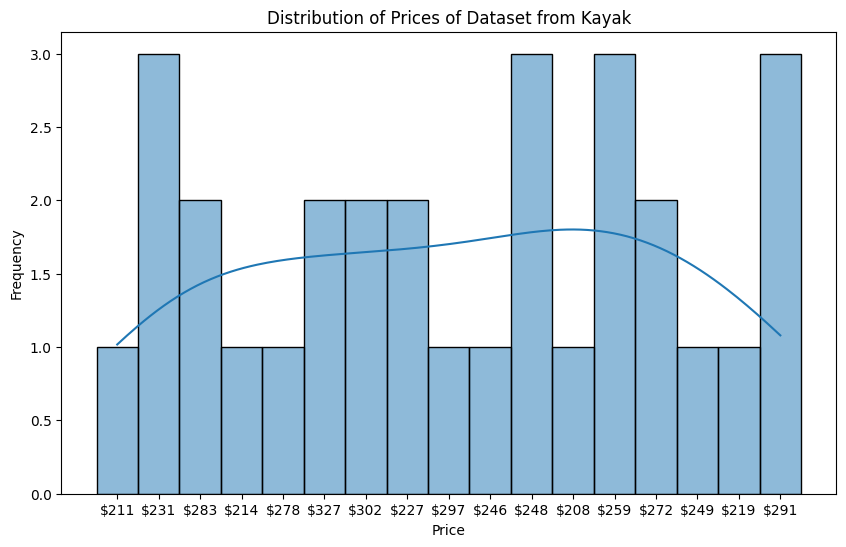

In [9]:
### Step 3 Visualizing the Data #####
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

file_path = '/content/Kayak.csv'

# Read CSV into DataFrame
df = pd.read_csv(file_path)


# Price Ranges
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=20, kde=True)
plt.title('Distribution of Prices of Dataset from Kayak')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


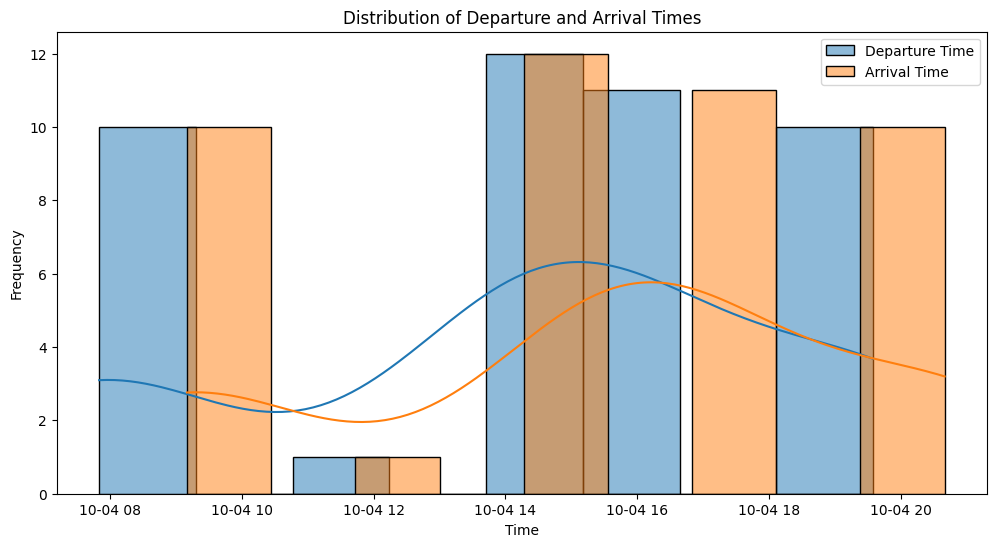

In [8]:
file_path = '/content/Skyscanner.csv'

# Read CSV into DataFrame
df = pd.read_csv(file_path)

# Considering First Flights Departure and Arrival Times

df['Flight1 Departure Time'] = pd.to_datetime(df['Flight1 Departure Time'])
df['Flight1 Arrival Time'] = pd.to_datetime(df['Flight1 Arrival Time'])

plt.figure(figsize=(12, 6))
sns.histplot(df['Flight1 Departure Time'], kde=True, label='Departure Time')
sns.histplot(df['Flight1 Arrival Time'], kde=True, label='Arrival Time')
plt.title('Distribution of Departure and Arrival Times')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.legend()
plt.show()
